In [2]:
import numpy as np
import cv2
import skimage.morphology as morp
import matplotlib.pyplot as plt

#import skimage
from skimage import data, exposure, img_as_float32
from skimage.util import img_as_ubyte
from skimage.filters import rank
from skimage.exposure import match_histograms

from my import cv2_imshow

DAMA_JPG = 'img/Dama.jpg'
LOW_JPG = 'img/low.jpg'
NOISY_PNG = 'img/noisy.png'


## Non_local_mean_image3_denoisingNLM

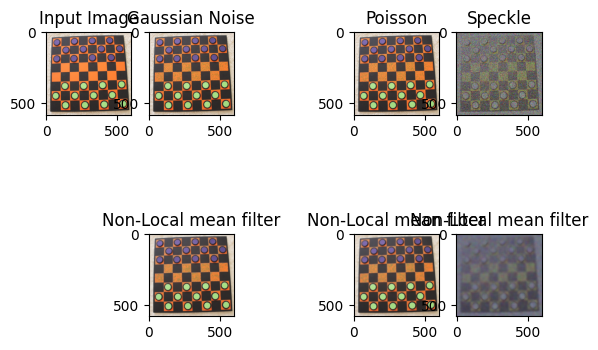

In [8]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.2
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1
      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      #gauss = np.random.randn(row,col,ch)
      gauss = np.random.normal(1, 1, (row, col, ch))
      gauss = gauss.reshape(row,col,ch)
      #noisy = image + image * gauss
      noisy =image * gauss
      return noisy

img = cv2.imread(DAMA_JPG, 1)
#img = img/255

dst1 = noisy("gauss",img)
#dst2 = noisy("s&p",img)
dst3 = noisy("poisson",img)
dst4 = noisy("speckle",img)


b,g,r = cv2.split(dst1)           # get b,g,r
rgb_img1 = cv2.merge([r,g,b])     # switch it to rgb
#b,g,r = cv2.split(dst2)           # get b,g,r
#rgb_img2 = cv2.merge([r,g,b])
b,g,r = cv2.split(dst3)           # get b,g,r
rgb_img3 = cv2.merge([r,g,b])
b,g,r = cv2.split(dst4)           # get b,g,r
rgb_img4 = cv2.merge([r,g,b])

rgb_img1 = np.uint8(rgb_img1)
#rgb_img2 = np.uint8(rgb_img2)
rgb_img3 = np.uint8(rgb_img3)
rgb_img4 = np.uint8(rgb_img4)

denois1 = cv2.fastNlMeansDenoisingColored(rgb_img1,None,20,20,5,11)
#denois2 = cv2.fastNlMeansDenoisingColored(rgb_img2,None,30,30,5,11)
denois3 = cv2.fastNlMeansDenoisingColored(rgb_img3,None,30,30,5,11)
denois4 = cv2.fastNlMeansDenoisingColored(rgb_img4,None,50,50,7,21)

b,g,r = cv2.split(img)           # get b,g,r
img1 = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(251),plt.imshow(img1),plt.title('Input Image')
plt.subplot(252),plt.imshow(rgb_img1),plt.title('Gaussian Noise')
#plt.subplot(253),plt.imshow(rgb_img2),plt.title('salt & pepper')
plt.subplot(254),plt.imshow(rgb_img3),plt.title('Poisson')
plt.subplot(255),plt.imshow(rgb_img4),plt.title('Speckle')

plt.subplot(257),plt.imshow(denois1),plt.title('Non-Local mean filter')
#plt.subplot(258),plt.imshow(denois2),plt.title('Non-Local mean filter')
plt.subplot(259),plt.imshow(denois3),plt.title('Non-Local mean filter')
plt.subplot(2,5,10),plt.imshow(denois4),plt.title('Non-Local mean filter')

plt.show()


## sharpening_filter_fonks

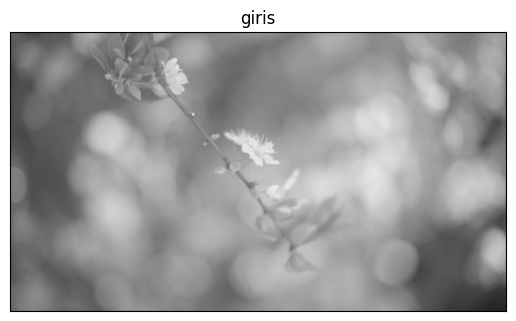

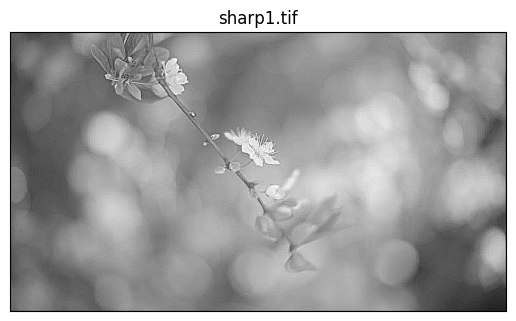

In [9]:
# Read the image
image = cv2.imread(LOW_JPG, 0)

# kernel = np.array([[0, -1, 0],
#                    [-1, 5,-1],
#                    [0, -1, 0]])

kernel = np.array([[-1, -1, -1],
                   [-1,9,-1],
                   [-1, -1, -1]])
dst = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)



cv2_imshow('giris', image)

cv2_imshow('sharp1.tif', dst)


## gaussian_blur_filter2

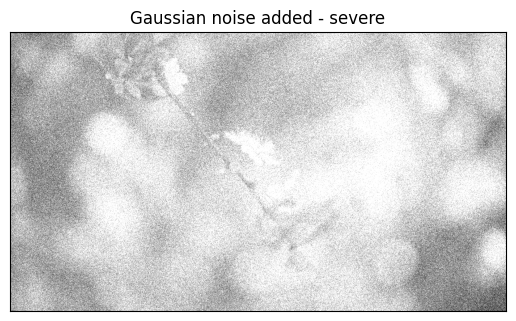

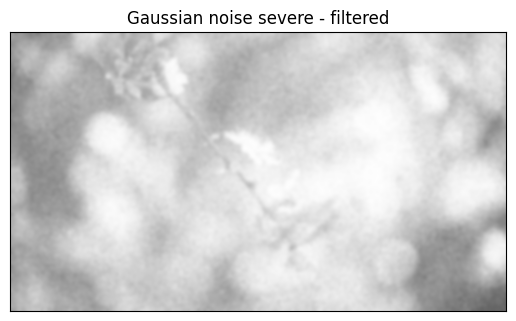

In [10]:

# Read the image
image = cv2.imread(LOW_JPG, 0)

noise_Gaussian = np.zeros((image.shape[0], image.shape[1]), dtype='uint8');

# Here a value of 64 is specified for a noise mean
# and 32 is specified for the standard deviation

cv2.randn(noise_Gaussian, 64, 32)

noisy_image = cv2.add(image, noise_Gaussian) 


filtered_image = cv2.GaussianBlur(noisy_image, (21,21), 3)

cv2_imshow("Gaussian noise added - severe", noisy_image)
cv2_imshow("Gaussian noise severe - filtered", filtered_image)


## averaging_filter_fonks

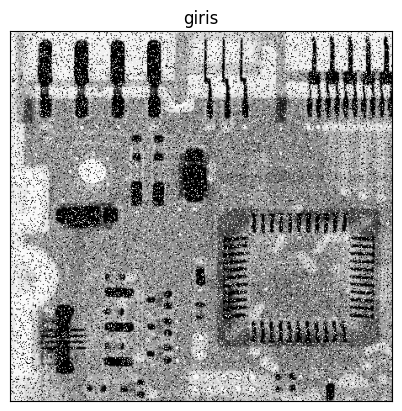

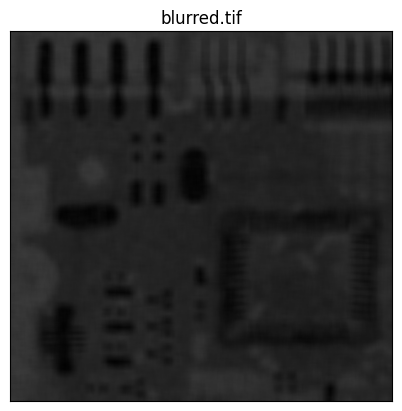

In [13]:
img = cv2.imread(NOISY_PNG,0)

m, n = img.shape

#  Averaging filter(3, 3)
mask = np.ones([11, 11], dtype = int)
mask = mask / 500

dst = cv2.filter2D(img,-1,mask)

cv2_imshow('giris', img)

cv2_imshow('blurred.tif', dst)


## averaging_filter

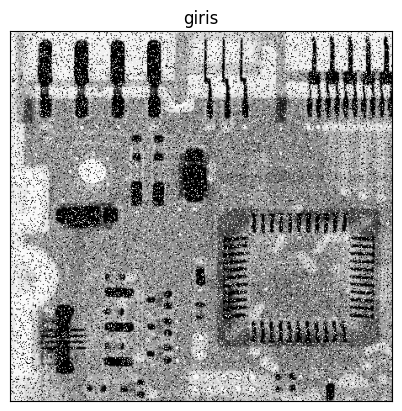

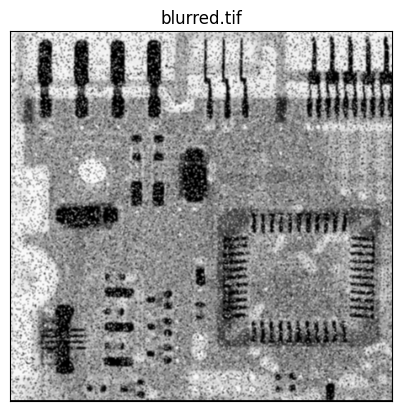

In [14]:
img = cv2.imread(NOISY_PNG,0)
  
m, n = img.shape
   
#  Averaging filter(3, 3)
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

mask2=(1/16)*np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype = int)
   
# Convolve the 3X3 mask over the image 
img_new = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask2[0, 0]+img[i-1, j]*mask2[0, 1]+img[i-1, j + 1]*mask2[0, 2]+img[i, j-1]*mask2[1, 0]+ img[i, j]*mask2[1, 1]+img[i, j + 1]*mask2[1, 2]+img[i + 1, j-1]*mask2[2, 0]+img[i + 1, j]*mask2[2, 1]+img[i + 1, j + 1]*mask2[2, 2]
         
        img_new[i, j]= temp
          
img_new = img_new.astype(np.uint8)

cv2_imshow('giris', img)

cv2_imshow('blurred.tif', img_new)


## Average_image1_blur1

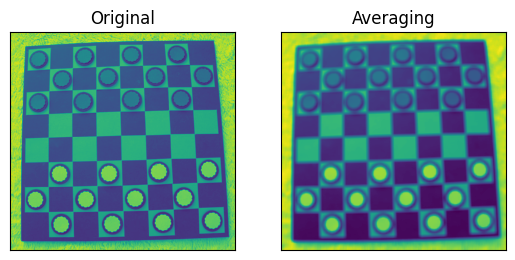

In [15]:
img = cv2.imread(DAMA_JPG, 0)
# create a mask

kernel = np.ones((11,11),np.float32)/121
dst = cv2.filter2D(img, -1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


## Average_image3_denoising0

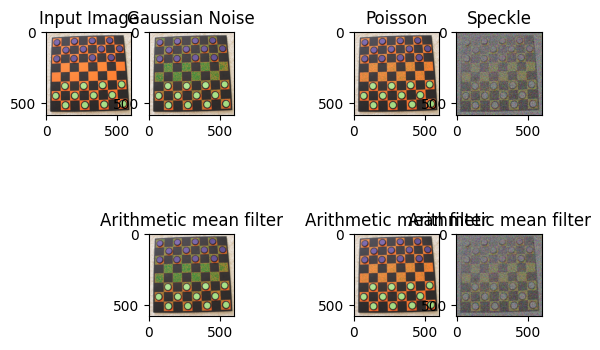

In [16]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 2
      var = 5
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.7
      amount = 0.4
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1
      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)
      noisy = image + image * gauss
      return noisy

img=cv2.imread(DAMA_JPG,1)

#img = img/255

dst1 = noisy("gauss",img)
# dst2 = noisy("s&p",img)
dst3 = noisy("poisson",img)
dst4 = noisy("speckle",img)


b,g,r = cv2.split(img)           # get b,g,r
img1 = cv2.merge([r,g,b])
b,g,r = cv2.split(dst1)           # get b,g,r
rgb_img1 = cv2.merge([r,g,b])     # switch it to rgb
# b,g,r = cv2.split(dst2)           # get b,g,r
# rgb_img2 = cv2.merge([r,g,b])
b,g,r = cv2.split(dst3)           # get b,g,r
rgb_img3 = cv2.merge([r,g,b])
b,g,r = cv2.split(dst4)           # get b,g,r
rgb_img4 = cv2.merge([r,g,b])

rgb_img1 = np.uint8(rgb_img1)
# rgb_img2 = np.uint8(rgb_img2)
rgb_img3 = np.uint8(rgb_img3)
rgb_img4 = np.uint8(rgb_img4)

# kernel = np.ones((5,5),np.float32)/25
# denois1 = cv2.filter2D(rgb_img1, -1,kernel)
# denois2 = cv2.filter2D(rgb_img2, -1,kernel)
# denois3 = cv2.filter2D(rgb_img3, -1,kernel)
# denois4 = cv2.filter2D(rgb_img4, -1,kernel)


denois1 = cv2.GaussianBlur(rgb_img1,(5,5),0)
# denois2 = cv2.GaussianBlur(rgb_img2,(5,5),0)
denois3 = cv2.GaussianBlur(rgb_img3,(5,5),0)
denois4 = cv2.GaussianBlur(rgb_img4,(5,5),0)


plt.subplot(251),plt.imshow(img1),plt.title('Input Image')
plt.subplot(252),plt.imshow(rgb_img1),plt.title('Gaussian Noise')
# plt.subplot(253),plt.imshow(rgb_img2),plt.title('salt & pepper')
plt.subplot(254),plt.imshow(rgb_img3),plt.title('Poisson')
plt.subplot(255),plt.imshow(rgb_img4),plt.title('Speckle')

plt.subplot(257),plt.imshow(denois1),plt.title('Arithmetic mean filter')
# plt.subplot(258),plt.imshow(denois2),plt.title('Arithmetic mean filter')
plt.subplot(259),plt.imshow(denois3),plt.title('Arithmetic mean filter')
plt.subplot(2,5,10),plt.imshow(denois4),plt.title('Arithmetic mean filter')

plt.show()


## gaussian_blur_filter

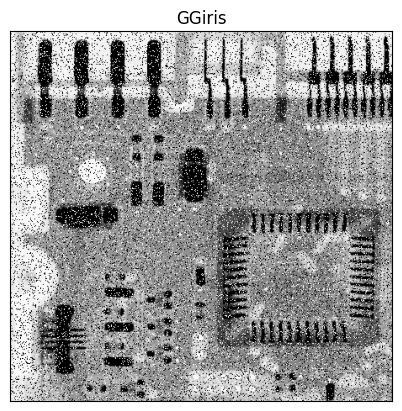

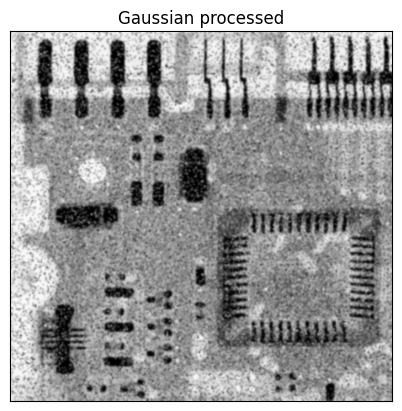

In [3]:
img = cv2.imread(NOISY_PNG,0)

image_gaussian_processed = cv2.GaussianBlur(img,(5,5),1)

cv2_imshow('GGiris',img)
cv2_imshow('Gaussian processed',image_gaussian_processed)




## averaging_filter2

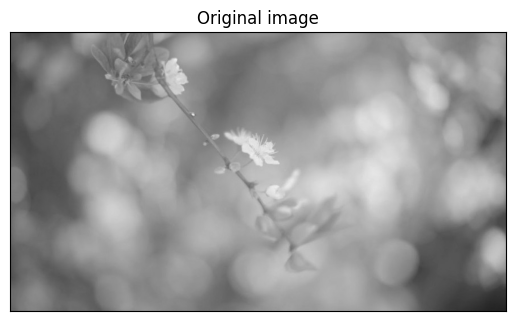

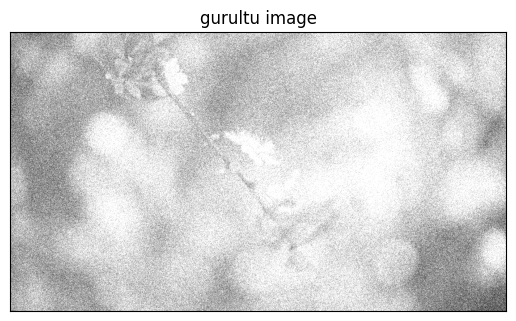

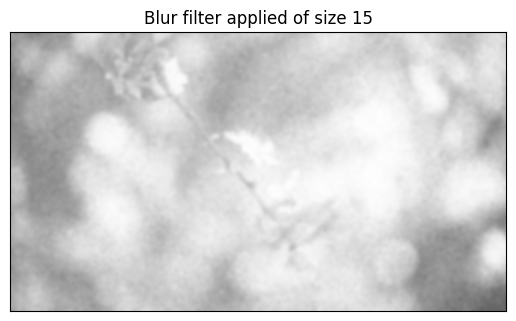

In [4]:
img = cv2.imread(LOW_JPG,0)

gurultu_gauss=np.zeros((img.shape[0],img.shape[1]),dtype='uint8')

cv2.randn(gurultu_gauss,64,32)

gurultu_img=cv2.add(img,gurultu_gauss)

filtered_image=cv2.GaussianBlur(gurultu_img,(15,15),3)

cv2_imshow('Original image',img)
cv2_imshow('gurultu image',gurultu_img)
cv2_imshow('Blur filter applied of size 15',filtered_image)


## sobel_sharpening

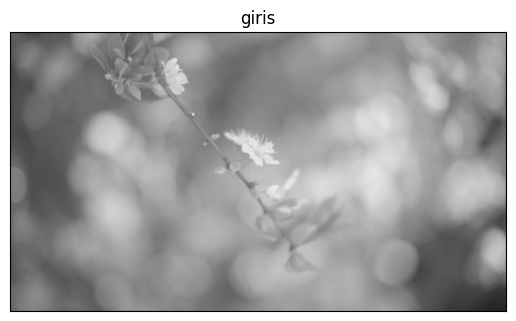

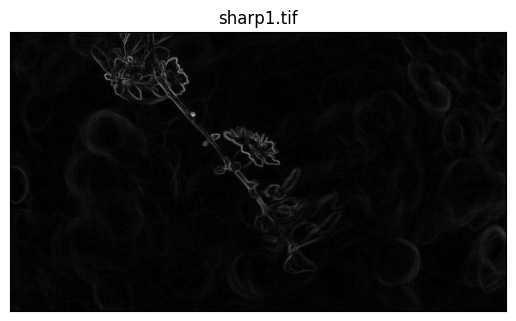

In [5]:
img = cv2.imread(LOW_JPG, 0)

#Sobel operator 
x = cv2.Sobel(img, cv2.CV_16S, 1, 0) # Yes x Find the first derivative 
y = cv2.Sobel(img, cv2.CV_16S, 0, 1) # Yes y Find the first derivative 
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

cv2_imshow('giris', img)

cv2_imshow('sharp1.tif', Sobel)


## highboost_sharpening_filter

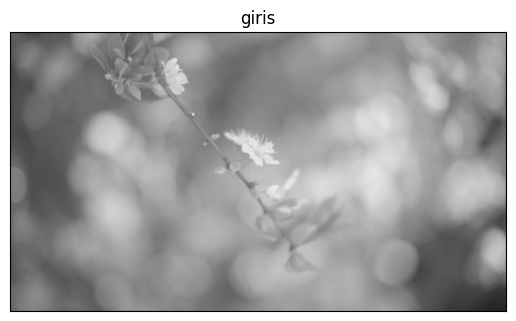

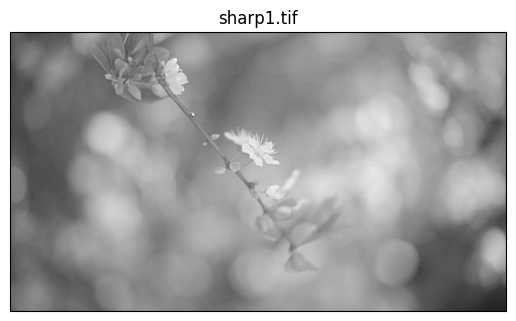

In [6]:
image = cv2.imread(LOW_JPG, 0)

gauss = cv2.GaussianBlur(image, (7,7), 0)
# Apply Unsharp masking
unsharp_image = cv2.addWeighted(image, 2, gauss, -1, 0)

cv2_imshow('giris', image)
cv2_imshow('sharp1.tif', unsharp_image)
